# 1. Fourier Transform

In [113]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [114]:
#匯入四個 raw檔
imgDatalena = np.fromfile('data/lena.raw', dtype='uint8')
imgDataBaboon = np.fromfile('data/Baboon.raw', dtype='uint8')
imgDataF16 = np.fromfile('data/F16.raw', dtype='uint8')
imgDataNoisy = np.fromfile('data/Noisy.raw', dtype='uint8')

In [115]:
def raw_read(imgData):
    nr = 512
    nc = 512
    nchan = 1
    c = 0 #用 c來記錄 raw檔讀取到的 index位置
    img = np.zeros((nr, nc, nchan))
    for i in range(nr):
        for j in range(nc):
            for k in range(0, nchan):
                img[i, j, k] = imgData[c]
                c=c+1
    return img

In [116]:
img_lena = raw_read(imgDatalena).reshape(512, 512)
img_Baboon = raw_read(imgDataBaboon).reshape(512, 512)
img_F16 = raw_read(imgDataF16).reshape(512, 512)
img_Noisy = raw_read(imgDataNoisy).reshape(512, 512)

### nearest neighbor (512 * 512)->(100 * 100)

In [118]:
def nearest_neighbor_resize(img, new_h, new_w):
    # height and width of the input img
    h, w = img.shape[0], img.shape[1]
    # new image with rgb channel
    ret_img = np.zeros(shape=(new_h, new_w), dtype='uint8')
    # scale factor
    s_h, s_c = (h * 1.0) / new_h, (w * 1.0) / new_w

    # insert pixel to the new img
    for i in range(new_h):
        for j in range(new_w):
            p_x = int(j * s_c)
            p_y = int(i * s_h)

            ret_img[i, j] = img[p_y, p_x]

    return ret_img

In [137]:
lena100 = nearest_neighbor_resize(img_lena.copy(), 100, 100)
Baboon100 = nearest_neighbor_resize(img_Baboon.copy(), 100, 100)
F16100 = nearest_neighbor_resize(img_F16.copy(), 100, 100)
Noisy100 = nearest_neighbor_resize(img_Noisy.copy(), 100, 100)

### i. Based on DFT, please draw the frequency response without shitting, where the lower-frequency will be located at four corners.

In [138]:
def forward_transform(matrix):
        """Computes the forward Fourier transform of the input matrix
        takes as input:
        matrix: a 2d matrix
        returns a complex matrix representing fourier transform"""

        # Using direct function
        # matrix1 = np.fft.fft2(matrix)

        # Without using direct function
        rows, columns = np.shape(matrix)
        matrix1 = np.zeros((rows, columns), dtype='float32')
        for u in range(rows):
            for v in range(columns):
                a = []
                for i in range(rows):
                    for j in range(columns):
                        omega = np.exp(-2 * math.pi * 1J * (((u * i) / rows) + ((v * j) / columns)))
                        a.append(matrix[i, j] * omega)
                matrix1[u, v] = sum(a)

        return matrix1

C:\Users\liou7\anaconda3\envs\MaskRCNN\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


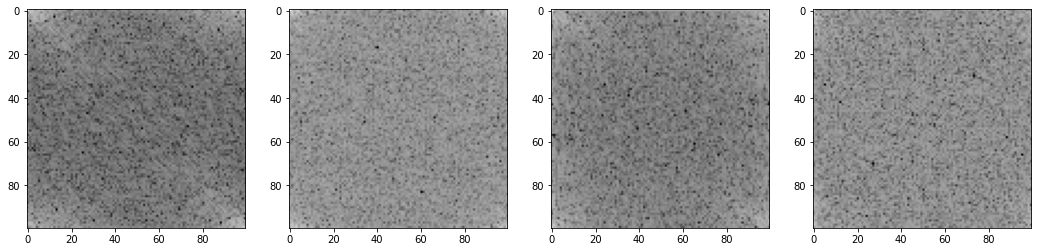

In [140]:
DFT_lena100 = np.log(np.abs(forward_transform(lena100.copy())))
DFT_Baboon100 = np.log(np.abs(forward_transform(Baboon100.copy())))
DFT_F16100 = np.log(np.abs(forward_transform(F16100.copy())))
DFT_Noisy100= np.log(np.abs(forward_transform(Noisy100.copy())))

images = [DFT_lena100, DFT_Baboon100, DFT_F16100, DFT_Noisy100]
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (18, 18))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p, cmap='gray')
plt.show()

### Noisy

C:\Users\liou7\anaconda3\envs\MaskRCNN\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


(array([[ 0.,  0.,  0.,  2.,  7., 42., 38.,  8.,  2.,  1.],
        [ 0.,  0.,  1.,  3.,  9., 37., 40., 10.,  0.,  0.],
        [ 0.,  0.,  1.,  2., 12., 45., 38.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  3., 14., 54., 28.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 18., 45., 36.,  1.,  0.,  0.],
        [ 1.,  0.,  0.,  1., 11., 54., 33.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  5., 12., 48., 34.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  7., 16., 53., 24.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  4., 18., 44., 33.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  4., 13., 58., 25.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  5., 15., 49., 31.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  7., 18., 57., 18.,  0.,  0.,  0.],
        [ 1.,  0.,  1.,  2., 17., 50., 29.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  8., 17., 50., 24.,  0.,  0.,  0.],
        [ 0.,  0.,  2.,  2., 20., 51., 25.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  2., 16., 57., 24.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 18., 46., 2

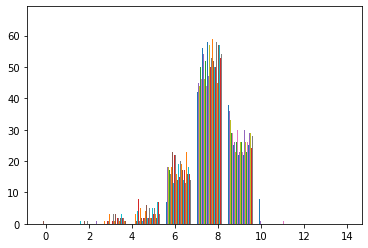

In [143]:
plt.hist(np.log(np.abs(forward_transform(Noisy100))))

### Baboon

C:\Users\liou7\anaconda3\envs\MaskRCNN\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


(array([[ 0.,  0.,  0.,  2.,  6., 51., 38.,  2.,  0.,  1.],
        [ 0.,  0.,  1.,  1.,  9., 40., 41.,  7.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  8., 46., 42.,  4.,  0.,  0.],
        [ 0.,  0.,  0.,  3., 13., 39., 39.,  6.,  0.,  0.],
        [ 0.,  1.,  0.,  1.,  9., 46., 40.,  3.,  0.,  0.],
        [ 0.,  1.,  0.,  4.,  9., 44., 38.,  4.,  0.,  0.],
        [ 0.,  0.,  0.,  3.,  9., 48., 39.,  1.,  0.,  0.],
        [ 0.,  0.,  2.,  1., 11., 45., 41.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  4.,  9., 43., 44.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1., 10., 45., 43.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  4., 12., 51., 30.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  7., 58., 35.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  1., 16., 49., 33.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  1., 13., 54., 31.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  2., 15., 52., 30.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1., 10., 50., 39.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  2.,  9., 52., 3

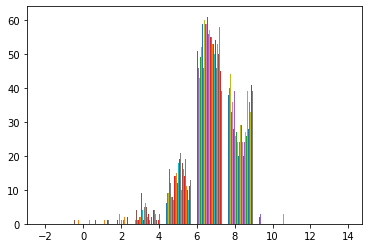

In [144]:
plt.hist(np.log(np.abs(forward_transform(Baboon100))))

### F16

C:\Users\liou7\anaconda3\envs\MaskRCNN\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


(array([[ 0.,  2.,  0.,  4.,  8., 41., 38.,  6.,  0.,  1.],
        [ 1.,  0.,  1.,  3.,  8., 43., 36.,  8.,  0.,  0.],
        [ 0.,  0.,  0.,  7., 14., 55., 23.,  1.,  0.,  0.],
        [ 0.,  0.,  2.,  2., 19., 47., 28.,  2.,  0.,  0.],
        [ 0.,  0.,  2.,  6., 16., 56., 18.,  2.,  0.,  0.],
        [ 0.,  0.,  1.,  2., 15., 56., 26.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  4., 27., 52., 17.,  0.,  0.,  0.],
        [ 0.,  2.,  1.,  5., 18., 55., 19.,  0.,  0.,  0.],
        [ 0.,  1.,  4.,  3., 24., 53., 15.,  0.,  0.,  0.],
        [ 0.,  2.,  1.,  7., 26., 51., 13.,  0.,  0.,  0.],
        [ 0.,  0.,  3., 11., 23., 55.,  8.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  8., 26., 54., 12.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 23., 60., 10.,  0.,  0.,  0.],
        [ 0.,  3.,  1., 11., 23., 50., 12.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  8., 21., 61.,  9.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  7., 26., 55., 12.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  5., 32., 55.,  

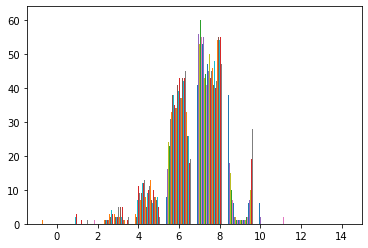

In [145]:
plt.hist(np.log(np.abs(forward_transform(F16100))))

### ii. Please show the centralized result based on (i)

In [141]:
def centralized(img):
    fft = forward_transform(img)
    shift_fft = np.fft.fftshift(fft)
    mag_dft = np.log(np.abs(shift_fft))
    cen_dft = post_process_image(mag_dft)
    return cen_dft

C:\Users\liou7\anaconda3\envs\MaskRCNN\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


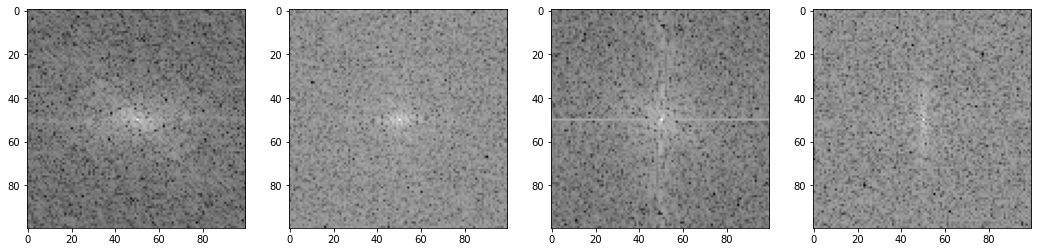

In [142]:
cen_lena100 = centralized(lena100)
cen_Baboon100 = centralized(Baboon100)
cen_F16100 = centralized(F16100)
cen_Noisy100= centralized(Noisy100)

images = [cen_lena100, cen_Baboon100, cen_F16100, cen_Noisy100]
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (18, 18))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p, cmap='gray')
plt.show()

In [18]:
def post_process_image(image):
        """Post process the image to create a full contrast stretch of the image
        takes as input:
        image: the image obtained from the inverse fourier transform
        return an image with full contrast stretch
        -----------------------------------------------------
        1. Full contrast stretch (fsimage)
        2. take negative (255 - fsimage)
        """
        a = 0
        b = 255
        c = np.min(image)
        d = np.max(image)
        rows, columns = np.shape(image)
        image1 = np.zeros((rows, columns), dtype=int)
        for i in range(rows):
            for j in range(columns):
                if (d-c) == 0:
                    image1[i, j] = ((b - a) / 0.000001) * (image[i, j] - c) + a
                else:
                    image1[i, j] = ((b - a) / (d - c)) * (image[i, j] - c) + a

        return np.uint8(image1)

In [19]:
def filtering(img, mask):
    # Compute the fft of the image
    fft = np.fft.fft2(img.copy())

    # shift the fft to center the low frequencies
    shift_fft = np.fft.fftshift(fft)
    mag_dft = np.log(np.abs(shift_fft))
    dft = post_process_image(mag_dft)
    
    # filter the image frequency based on the mask (Convolution theorem)
    filtered_image = np.multiply(mask, shift_fft)
    mag_filtered_dft = np.log(np.abs(filtered_image)+1)
    filtered_dft = post_process_image(mag_filtered_dft)
    
    # compute the inverse shift
    shift_ifft = np.fft.ifftshift(filtered_image)
    
    # compute the inverse fourier transform
    ifft = np.fft.ifft2(shift_ifft)
    
    # compute the magnitude
    mag = np.abs(ifft)
    
    filtered_image = post_process_image(mag)
    
    return np.uint8(filtered_image)

# 5. DCT as the image restoration domain

In [21]:
def discrete_cosine_tranform(matrix):
        """Computes the discrete cosine transform of the input matrix
        takes as input:
        matrix: a 2d matrix
        returns a matrix representing discrete cosine transform"""

        rows, columns = np.shape(matrix)
        matrix1 = np.zeros((rows, columns), dtype=float)
        for u in range(rows):
            for v in range(columns):
                a = []
                for i in range(rows):
                    for j in range(columns):
                        temp = math.cos(2 * math.pi * (((u * i) / rows) + ((v * j) / columns)))
                        a.append(matrix[i, j] * temp)
                matrix1[u, v] = sum(a)

        return matrix1

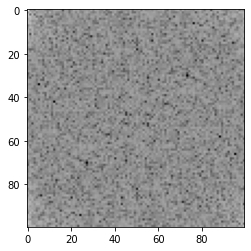

In [73]:
plt.imshow(np.log(np.abs(discrete_cosine_tranform(Noisy100.copy()))), cmap = 'gray')

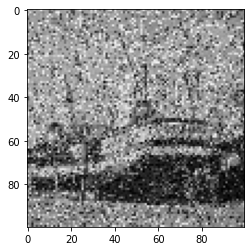

In [74]:
plt.imshow(filtering(Noisy50.copy(), np.log(np.abs(discrete_cosine_tranform(Noisy100.copy())))), cmap = 'gray')